Implémentation de résolution numérique approchée de l'équation 1 :
$\frac{dy}{dx} = f(x,y), 
y(a) = A$
à l'aide de la la méthode de descente de gradients sur la fonction d'erreur


In [176]:
#imports
from numpy import pi, cos, sin, dot, zeros, linspace, arange, matmul
from numpy.random import randn

from matplotlib.pyplot import plot, show, yscale, legend, savefig

Paramètres du modèle

In [177]:
#nombre de coefficients de Fourier ajustables
M = 10
M_range = arange(M) + 1

# nombre de points pour la variable indépendante
N = 100
X = linspace(0,1,N, endpoint=False)

Définition du gradient

In [178]:
def calcGrad(A, M, N, X) :
    #Calcule le gradient de l'erreur par rapport au vecteur
    #des coefficients
    grad = zeros((M))
    V = cos(2*pi*X)
    for m in range(1, M+1) :
        for i in range(N) :
            V[i] += 2*pi*m*A[m-1]*cos(2*pi*m*X[i])
    for l in range(1, M+1) :
        W = pi*l*cos(2*pi*l*X)
        grad[l-1] = dot(V,W)
    return grad

Calcul matriciel du gradient

In [179]:
mat = zeros((M,M))

for l in range(1,M+1) :
    for m in range(1,M+1) :
        mat[m-1,l-1] = m*l*dot(cos(2*pi*m*X), cos(2*pi*l*X))
mat *= 2*pi

b = zeros(M)
for l in range(1,M+1) :
    b[l-1] = -l*dot(cos(2*pi*X), cos(2*pi*l*X))
d = -b

def calcGrad_mat(A, mat, d) :
    return matmul(mat, A) + d

Calcul de l'erreur

In [180]:
def calcError(A, M, N, X) :
    E = 0
    for i in range(N) :
        e = 0
        for m in range(1,M+1) :
            e+=m*A[m-1]*cos(2*pi*m*X[i])
        e *= 2*pi
        e+= cos(2*pi*X[i])
        E += e**2

    E *=0.5
    return E

Paramètres d'apprentissage

In [181]:
alpha_min = 6.21894189418942e-05 #taux d'apprentissage pour la descente de gradients
alph_1 = 6.280708070807081e-05 #taux d'apprentissage pour la descente de gradients
epochs = 10000 #nombre d'itération

#initialisation des coefficients
A_min = randn((M))
A_1 = randn((M))

Entraînement

In [182]:
E_min = []
E_1 = []

for k in range(epochs) :
    if k%(epochs//100)==0 :
        #print("Coefficients après",k,"itérations :",A)
        E_min.append(calcError(A_min,M,N,X))
        E_1.append(calcError(A_1,M,N,X))

    A_min -= alpha_min*calcGrad_mat(A_min, mat, d)
    A_1 -= alpha_min*calcGrad_mat(A_1, mat, d)

E_min.append(calcError(A_min,M,N,X))
E_1.append(calcError(A_1,M,N,X))

Affichage des résultats

In [183]:
print()
print("Coefficients finaux A_min après",epochs,"itérations :",A_min)
print("Coefficients finaux A_1 après",epochs,"itérations :",A_1)


Coefficients finaux A_min après 10000 itérations : [-1.59154943e-01 -4.44934716e-18 -3.10424070e-18 -2.22717858e-18
 -1.73071810e-18 -1.46797176e-18 -1.29758642e-18 -1.08809976e-18
 -1.03503004e-18 -6.33770443e-19]
Coefficients finaux A_1 après 10000 itérations : [-1.59154943e-01 -5.46011032e-18 -3.88018767e-18 -2.72759918e-18
 -2.14871931e-18 -1.85827831e-18 -1.55067315e-18 -1.46517325e-18
 -1.53946447e-18 -3.90979373e-18]


Affichage graphique de l'erreur

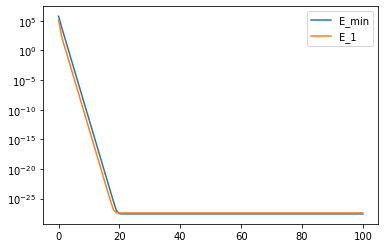

In [186]:
plot(range(101), E_min, label = 'E_min')
plot(range(101), E_1, label = 'E_1')
yscale('log')
legend()
savefig("comparaison_erreurs_selon_alpha.jpg")
show()

In [185]:
#print((A[0]+(1/2/pi)), (A[0]+(1/2/pi))*2*pi)